In [1]:
import acados
import importlib

importlib.reload(acados)

<module 'acados' from '/home/amon/Repositories/l4acados/examples/l4casadi_vs_l4acados/acados.py'>

In [2]:
from acados import run, MultiLayerPerceptron, DoubleIntegratorWithLearnedDynamics, MPC
import l4casadi as l4c
import numpy as np
import time
import l4acados as l4a
from typing import Optional, Union
import torch
import casadi as cs

In [3]:
from l4acados.controllers.residual_learning_mpc import ResidualLearningMPC
from l4acados.models import ResidualModel, PyTorchFeatureSelector
from l4acados.controllers.zoro_acados_utils import setup_sim_from_ocp

In [4]:
import copy

In [5]:
from run_single_experiment import *

In [6]:
N = 20
ts = 1.0 / N
batch_dim = 1
hidden_layers = 5
warmup_iter = 100
solve_steps = 1000
num_threads = 1
# device = "cpu"
device = "cuda"
num_threads_acados_openmp = 4

In [7]:
x_l4casadi, opt_times_l4casadi, x_l4acados, opt_times_l4acados = run(
    N,
    hidden_layers,
    solve_steps,
    device=device,
    num_threads_acados_openmp=num_threads_acados_openmp,
)

CMake Deprecation Warning at CMakeLists.txt:32 (cmake_minimum_required):
  Compatibility with CMake < 3.10 will be removed from a future version of
  CMake.

  Update the VERSION argument <min> value.  Or, use the <min>...<max> syntax
  to tell CMake that the project requires at least <min> but has been updated
  to work with policies introduced by <max> or earlier.


CMake Deprecation Warning at external/blasfeo/CMakeLists.txt:36 (cmake_minimum_required):
  Compatibility with CMake < 3.10 will be removed from a future version of
  CMake.

  Update the VERSION argument <min> value.  Or, use the <min>...<max> syntax
  to tell CMake that the project requires at least <min> but has been updated
  to work with policies introduced by <max> or earlier.




-- Build type is Release
-- OpenMP_CXX_FLAGS: -fopenmp, OpenMP_C_FLAGS: -fopenmp
-- Using linear algebra: HIGH_PERFORMANCE
-- Using matrix format: PANELMAJ
-- Using external BLAS: 0
-- Testing target X64_INTEL_HASWELL: assembly compilation [success]
-- Testing target X64_INTEL_HASWELL: assembly run [success]
-- Testing target X64_INTEL_HASWELL: intrinsic compilation [success]
-- Testing target X64_INTEL_HASWELL: intrinsic run [success]
-- Detected target X64_INTEL_HASWELL
-- Using BLASFEO path: 
-- Installation directory: /home/amon/Repositories/l4acados/external/acados
--  
-- Target: BLASFEO is X64_AUTOMATIC, HPIPM is X64_AUTOMATIC
-- Linear algebra: HIGH_PERFORMANCE
-- Octave MEX (OFF)
-- System name:version Linux:6.9.3-76060903-generic
-- Build type is Release
-- Installation directory is /home/amon/Repositories/l4acados/external/acados
-- OpenMP parallelization is ON
-- Number of threads for acados with openMP (ACADOS_NUM_THREADS) 4
--  
-- Configuring done (0.3s)
-- Generating do

CMake Deprecation Warning at external/hpipm/CMakeLists.txt:36 (cmake_minimum_required):
  Compatibility with CMake < 3.10 will be removed from a future version of
  CMake.

  Update the VERSION argument <min> value.  Or, use the <min>...<max> syntax
  to tell CMake that the project requires at least <min> but has been updated
  to work with policies introduced by <max> or earlier.


/home/amon/.pyenv/versions/3.9.13/envs/l4acados_dev/lib/python3.9/site-packages/torch/jit/_check.py:178: UserWarning: The TorchScript type system doesn't support instance-level annotations on empty non-base types in `__init__`. Instead, either 1) use a type annotation in the class body, or 2) wrap the type in `torch.jit.Attribute`.
  warnings.warn(


field AcadosOcpDims.N has been migrated to AcadosOcpOptions.N_horizon. setting AcadosOcpOptions.N_horizon = N. For future comppatibility, please use AcadosOcpOptions.N_horizon directly.CUDA is available! Using GPU cuda.

 If there is an incompatibility with the CasADi generated code, please consider changing your CasADi version.
Version 3.6.7 currently in use.
rm -f libacados_ocp_solver_wr.so
rm -f acados_solver_wr.o
cc -fPIC -std=c99   -O2 -I/home/amon/Repositories/l4acados/external/acados/include -I/home/amon/Repositories/l4acados/external/acados/include/acados -I/home/amon/Repositories/l4acados/external/acados/include/blasfeo/include -I/home/amon/Repositories/l4acados/external/acados/include/hpipm/include  -c -o acados_solver_wr.o acados_solver_wr.c
cc -fPIC -std=c99   -O2 -I/home/amon/Repositories/l4acados/external/acados/include -I/home/amon/Repositories/l4acados/external/acados/include/acados -I/home/amon/Repositories/l4acados/external/acados/include/blasfeo/include -I/home/amon/

make: *** No rule to make target 'clean_all'.  Stop.


cc -fPIC -std=c99   -O2 -I/home/amon/Repositories/l4acados/external/acados/include -I/home/amon/Repositories/l4acados/external/acados/include/acados -I/home/amon/Repositories/l4acados/external/acados/include/blasfeo/include -I/home/amon/Repositories/l4acados/external/acados/include/hpipm/include  -c -o acados_solver_linear_model_with_params_nx2_nu1_np0.o acados_solver_linear_model_with_params_nx2_nu1_np0.c
cc -fPIC -std=c99   -O2 -I/home/amon/Repositories/l4acados/external/acados/include -I/home/amon/Repositories/l4acados/external/acados/include/acados -I/home/amon/Repositories/l4acados/external/acados/include/blasfeo/include -I/home/amon/Repositories/l4acados/external/acados/include/hpipm/include  -c -o linear_model_with_params_nx2_nu1_np0_model/linear_model_with_params_nx2_nu1_np0_dyn_disc_phi_fun.o linear_model_with_params_nx2_nu1_np0_model/linear_model_with_params_nx2_nu1_np0_dyn_disc_phi_fun.c
cc -fPIC -std=c99   -O2 -I/home/amon/Repositories/l4acados/external/acados/include -I/ho

In file included from /home/amon/.pyenv/versions/3.9.13/envs/l4acados_dev/lib/python3.9/site-packages/numpy/_core/include/numpy/ndarraytypes.h:1909,
                 from /home/amon/.pyenv/versions/3.9.13/envs/l4acados_dev/lib/python3.9/site-packages/numpy/_core/include/numpy/ndarrayobject.h:12,
                 from /home/amon/.pyenv/versions/3.9.13/envs/l4acados_dev/lib/python3.9/site-packages/numpy/_core/include/numpy/arrayobject.h:5,
                 from acados_ocp_solver_pyx.c:1230:
/home/amon/.pyenv/versions/3.9.13/envs/l4acados_dev/lib/python3.9/site-packages/numpy/_core/include/numpy/npy_1_7_deprecated_api.h:17:2: warning: #warning "Using deprecated NumPy API, disable it with " "#define NPY_NO_DEPRECATED_API NPY_1_7_API_VERSION" [-Wcpp]
   17 | #warning "Using deprecated NumPy API, disable it with " \
      |  ^~~~~~~


cc  -shared \
-o acados_ocp_solver_pyx.so \
-Wl,-rpath=/home/amon/Repositories/l4acados/external/acados/lib \
acados_ocp_solver_pyx.o \
/home/amon/Repositories/l4acados/examples/l4casadi_vs_l4acados/c_generated_code/libacados_ocp_solver_linear_model_with_params_nx2_nu1_np0.so \
-L/home/amon/Repositories/l4acados/external/acados/lib -lacados -lhpipm -lblasfeo -lm
 If there is an incompatibility with the CasADi generated code, please consider changing your CasADi version.
Version 3.6.7 currently in use.
rm -f libacados_sim_solver_wr_new.so
rm -f acados_sim_solver_wr_new.o
rm -f acados_sim_solver_pyx.so
rm -f acados_sim_solver_pyx.o
cc -fPIC -std=c99   -O2 -I/home/amon/Repositories/l4acados/external/acados/include -I/home/amon/Repositories/l4acados/external/acados/include/acados -I/home/amon/Repositories/l4acados/external/acados/include/blasfeo/include -I/home/amon/Repositories/l4acados/external/acados/include/hpipm/include  -c -o acados_sim_solver_wr_new.o acados_sim_solver_wr_new.c
cc -

In file included from /home/amon/.pyenv/versions/3.9.13/envs/l4acados_dev/lib/python3.9/site-packages/numpy/_core/include/numpy/ndarraytypes.h:1909,
                 from /home/amon/.pyenv/versions/3.9.13/envs/l4acados_dev/lib/python3.9/site-packages/numpy/_core/include/numpy/ndarrayobject.h:12,
                 from /home/amon/.pyenv/versions/3.9.13/envs/l4acados_dev/lib/python3.9/site-packages/numpy/_core/include/numpy/arrayobject.h:5,
                 from acados_sim_solver_pyx.c:1230:
/home/amon/.pyenv/versions/3.9.13/envs/l4acados_dev/lib/python3.9/site-packages/numpy/_core/include/numpy/npy_1_7_deprecated_api.h:17:2: warning: #warning "Using deprecated NumPy API, disable it with " "#define NPY_NO_DEPRECATED_API NPY_1_7_API_VERSION" [-Wcpp]
   17 | #warning "Using deprecated NumPy API, disable it with " \
      |  ^~~~~~~


cc  -shared \
-o acados_sim_solver_pyx.so \
-Wl,-rpath=/home/amon/Repositories/l4acados/external/acados/lib \
acados_sim_solver_pyx.o \
/home/amon/Repositories/l4acados/examples/l4casadi_vs_l4acados/c_generated_code/libacados_sim_solver_wr_new.so \
-L/home/amon/Repositories/l4acados/external/acados/lib -lacados -lhpipm -lblasfeo -lm
Running timing experiment: 0/1000
Running timing experiment: 1/1000
Running timing experiment: 2/1000
Running timing experiment: 3/1000
Running timing experiment: 4/1000
Running timing experiment: 5/1000
Running timing experiment: 6/1000
Running timing experiment: 7/1000
Running timing experiment: 8/1000
Running timing experiment: 9/1000
Running timing experiment: 10/1000
Running timing experiment: 11/1000
Running timing experiment: 12/1000
Running timing experiment: 13/1000
Running timing experiment: 14/1000
Running timing experiment: 15/1000
Running timing experiment: 16/1000
Running timing experiment: 17/1000
Running timing experiment: 18/1000
Running ti

In [8]:
import matplotlib.pyplot as plt

In [9]:
opt_times_l4casadi_avg = np.cumsum(opt_times_l4casadi[warmup_iter:]) / np.arange(
    1, len(opt_times_l4casadi[warmup_iter:]) + 1
)
opt_times_l4acados_avg = np.cumsum(opt_times_l4acados[warmup_iter:]) / np.arange(
    1, len(opt_times_l4acados[warmup_iter:]) + 1
)

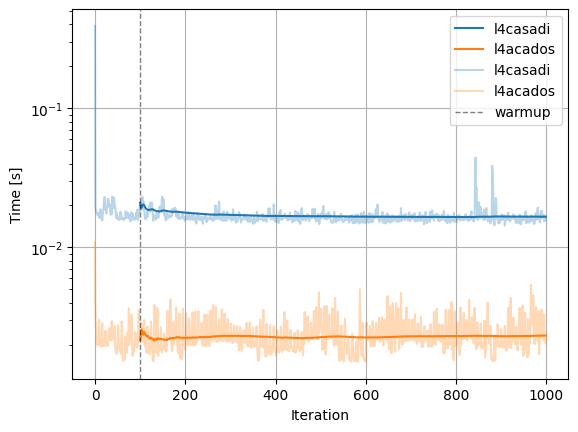

In [10]:
h_l4casadi = plt.plot(
    np.arange(warmup_iter, len(opt_times_l4casadi)),
    opt_times_l4casadi_avg,
    label="l4casadi",
)
h_l4acados = plt.plot(
    np.arange(warmup_iter, len(opt_times_l4casadi)),
    opt_times_l4acados_avg,
    label="l4acados",
)
plt.plot(
    opt_times_l4casadi,
    label="l4casadi",
    color=h_l4casadi[0].get_color(),
    alpha=0.3,
)
plt.plot(
    opt_times_l4acados,
    label="l4acados",
    color=h_l4acados[0].get_color(),
    alpha=0.3,
)
plt.axvline(
    x=warmup_iter, color="k", linestyle="--", linewidth=1, label="warmup", alpha=0.5
)
# axes scaling log
# plt.xscale("log")
plt.yscale("log")
# axes title y
plt.ylabel("Time [s]")
plt.xlabel("Iteration")
plt.legend()
# plt.ylim([1e-3, 1e-1])
plt.grid()

In [11]:
opt_times_l4casadi_avg[-1], opt_times_l4acados_avg[-1], opt_times_l4casadi_avg[
    -1
] / opt_times_l4acados_avg[-1]

(np.float64(0.016613875351112153),
 np.float64(0.0023242618188911972),
 np.float64(7.148022316624338))

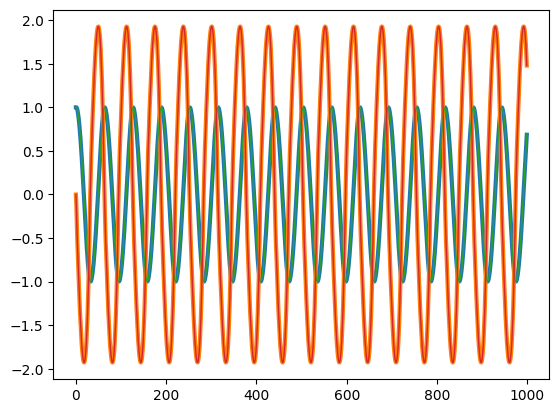

In [12]:
plt.plot(x_l4casadi, linewidth=3)
plt.plot(x_l4acados, linewidth=1)

In [13]:
np.linalg.norm(np.array(x_l4casadi) - np.array(x_l4acados))

np.float64(8.300269194450035e-12)

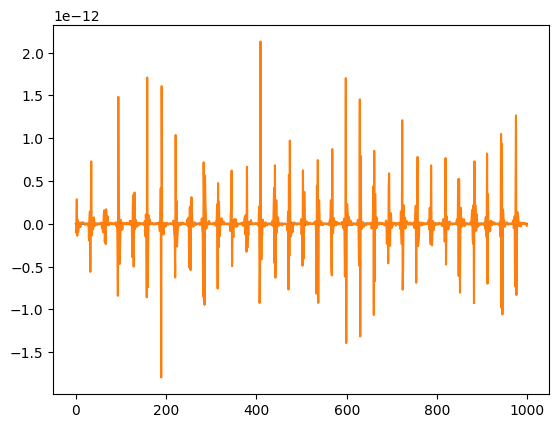

In [14]:
plt.plot(np.array(x_l4acados) - np.array(x_l4casadi))